In [291]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [292]:
#importing dataset
df=pd.read_csv('baseball.csv')

In [293]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


it is aregression problem we want to predict no of wins

In [294]:
df.shape

(30, 17)

In [295]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# DATA PREPROCESSING

In [296]:
#checking null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

no  null values present

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


1)all dtypes are correct and no missing values
2)all are numerical columns

In [298]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


1) all columns has no missing values
2)in some features mean is less than median means data is left skeweed and some  features median is less than mean means data is right skewed.
3)in mpost of columns 75% and max has more difference means there is outliers in data.

# DATA VISULIZATION

<Axes: xlabel='R', ylabel='W'>

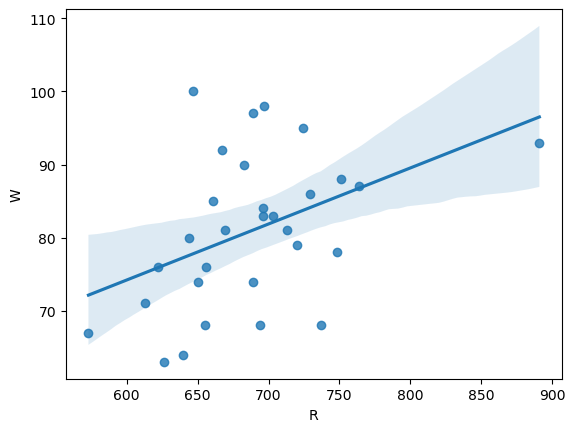

In [299]:
#checking the relation between W vs R
sns.regplot(x='R',y='W',data=df)

The R and W wins are highly positive correlated

<Axes: xlabel='AB', ylabel='W'>

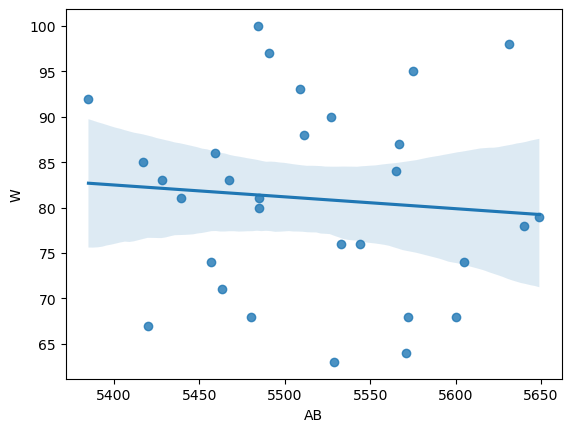

In [300]:
#checking the relation between W vs AB
sns.regplot(x='AB',y='W',data=df)

There is no more relation between w and AB

<Axes: xlabel='H', ylabel='W'>

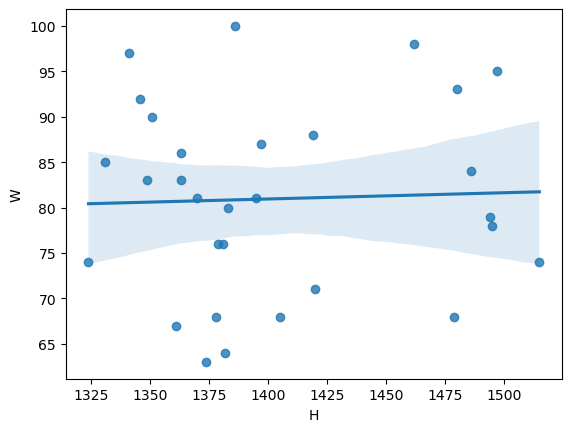

In [301]:
#checking the relation between W vs H
sns.regplot(x='H',y='W',data=df)

There is no relation between W and H

<Axes: xlabel='2B', ylabel='W'>

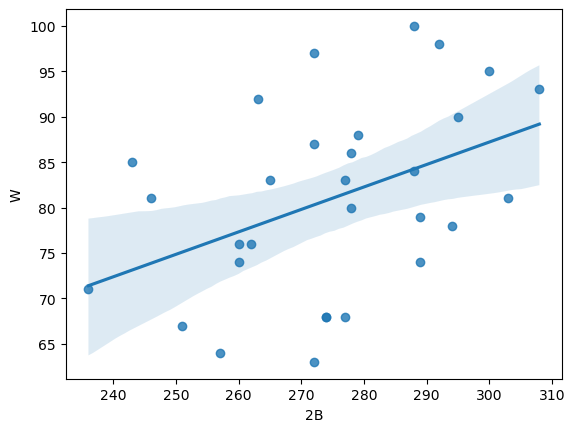

In [302]:
#checking the relation between H vs 2B
sns.regplot(x='2B',y='W',data=df)

The 2B and W wins are highly positive correlated

<Axes: xlabel='3B', ylabel='W'>

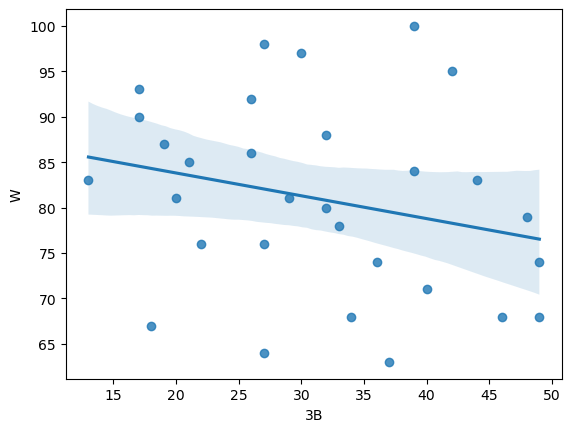

In [303]:
#checking the relation between H vs 3B
sns.regplot(x='3B',y='W',data=df)

The 2B and W wins are highly NEGATIVE correlated

<Axes: xlabel='HR', ylabel='W'>

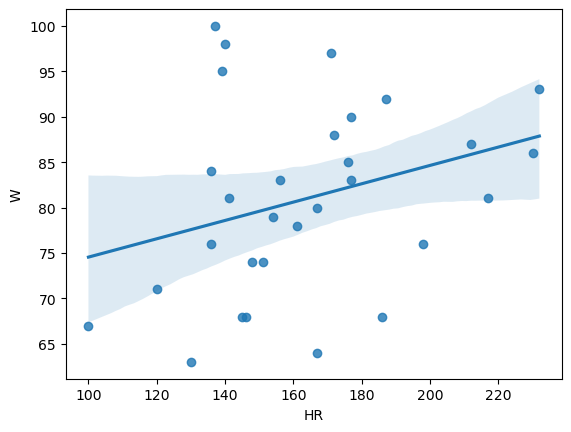

In [304]:
#checking the relation between W vs HR
sns.regplot(x='HR',y='W',data=df)

The HR and W wins are highly positive correlated

<Axes: xlabel='BB', ylabel='W'>

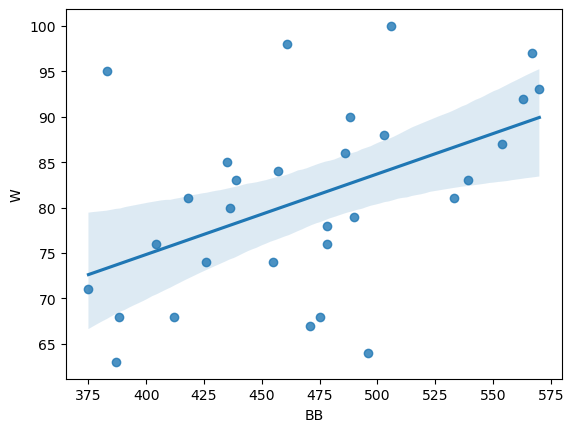

In [305]:
#checking the relation between W vs HR
sns.regplot(x='BB',y='W',data=df)

<Axes: xlabel='ER', ylabel='W'>

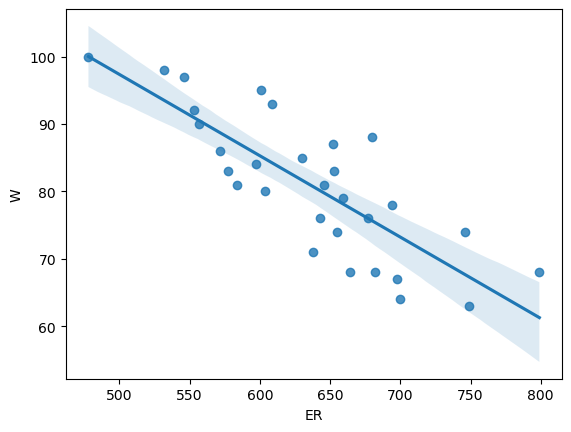

In [306]:
#checking the relation between W vs HR
sns.regplot(x='ER',y='W',data=df)

there is high negative correlation

<Axes: xlabel='ERA', ylabel='W'>

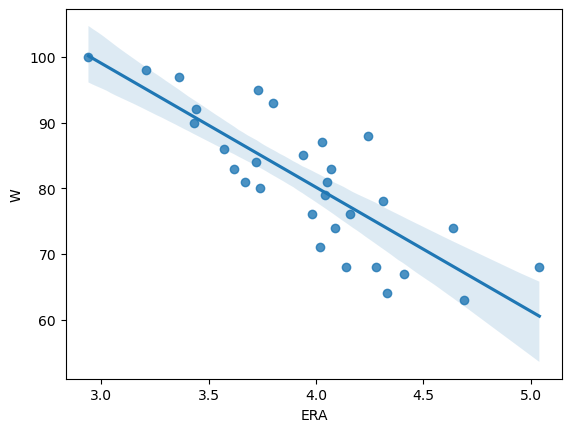

In [307]:
#checking the relation between W vs HR
sns.regplot(x='ERA',y='W',data=df)

there is high negative correlation

The BB and W wins are highly positive correlated

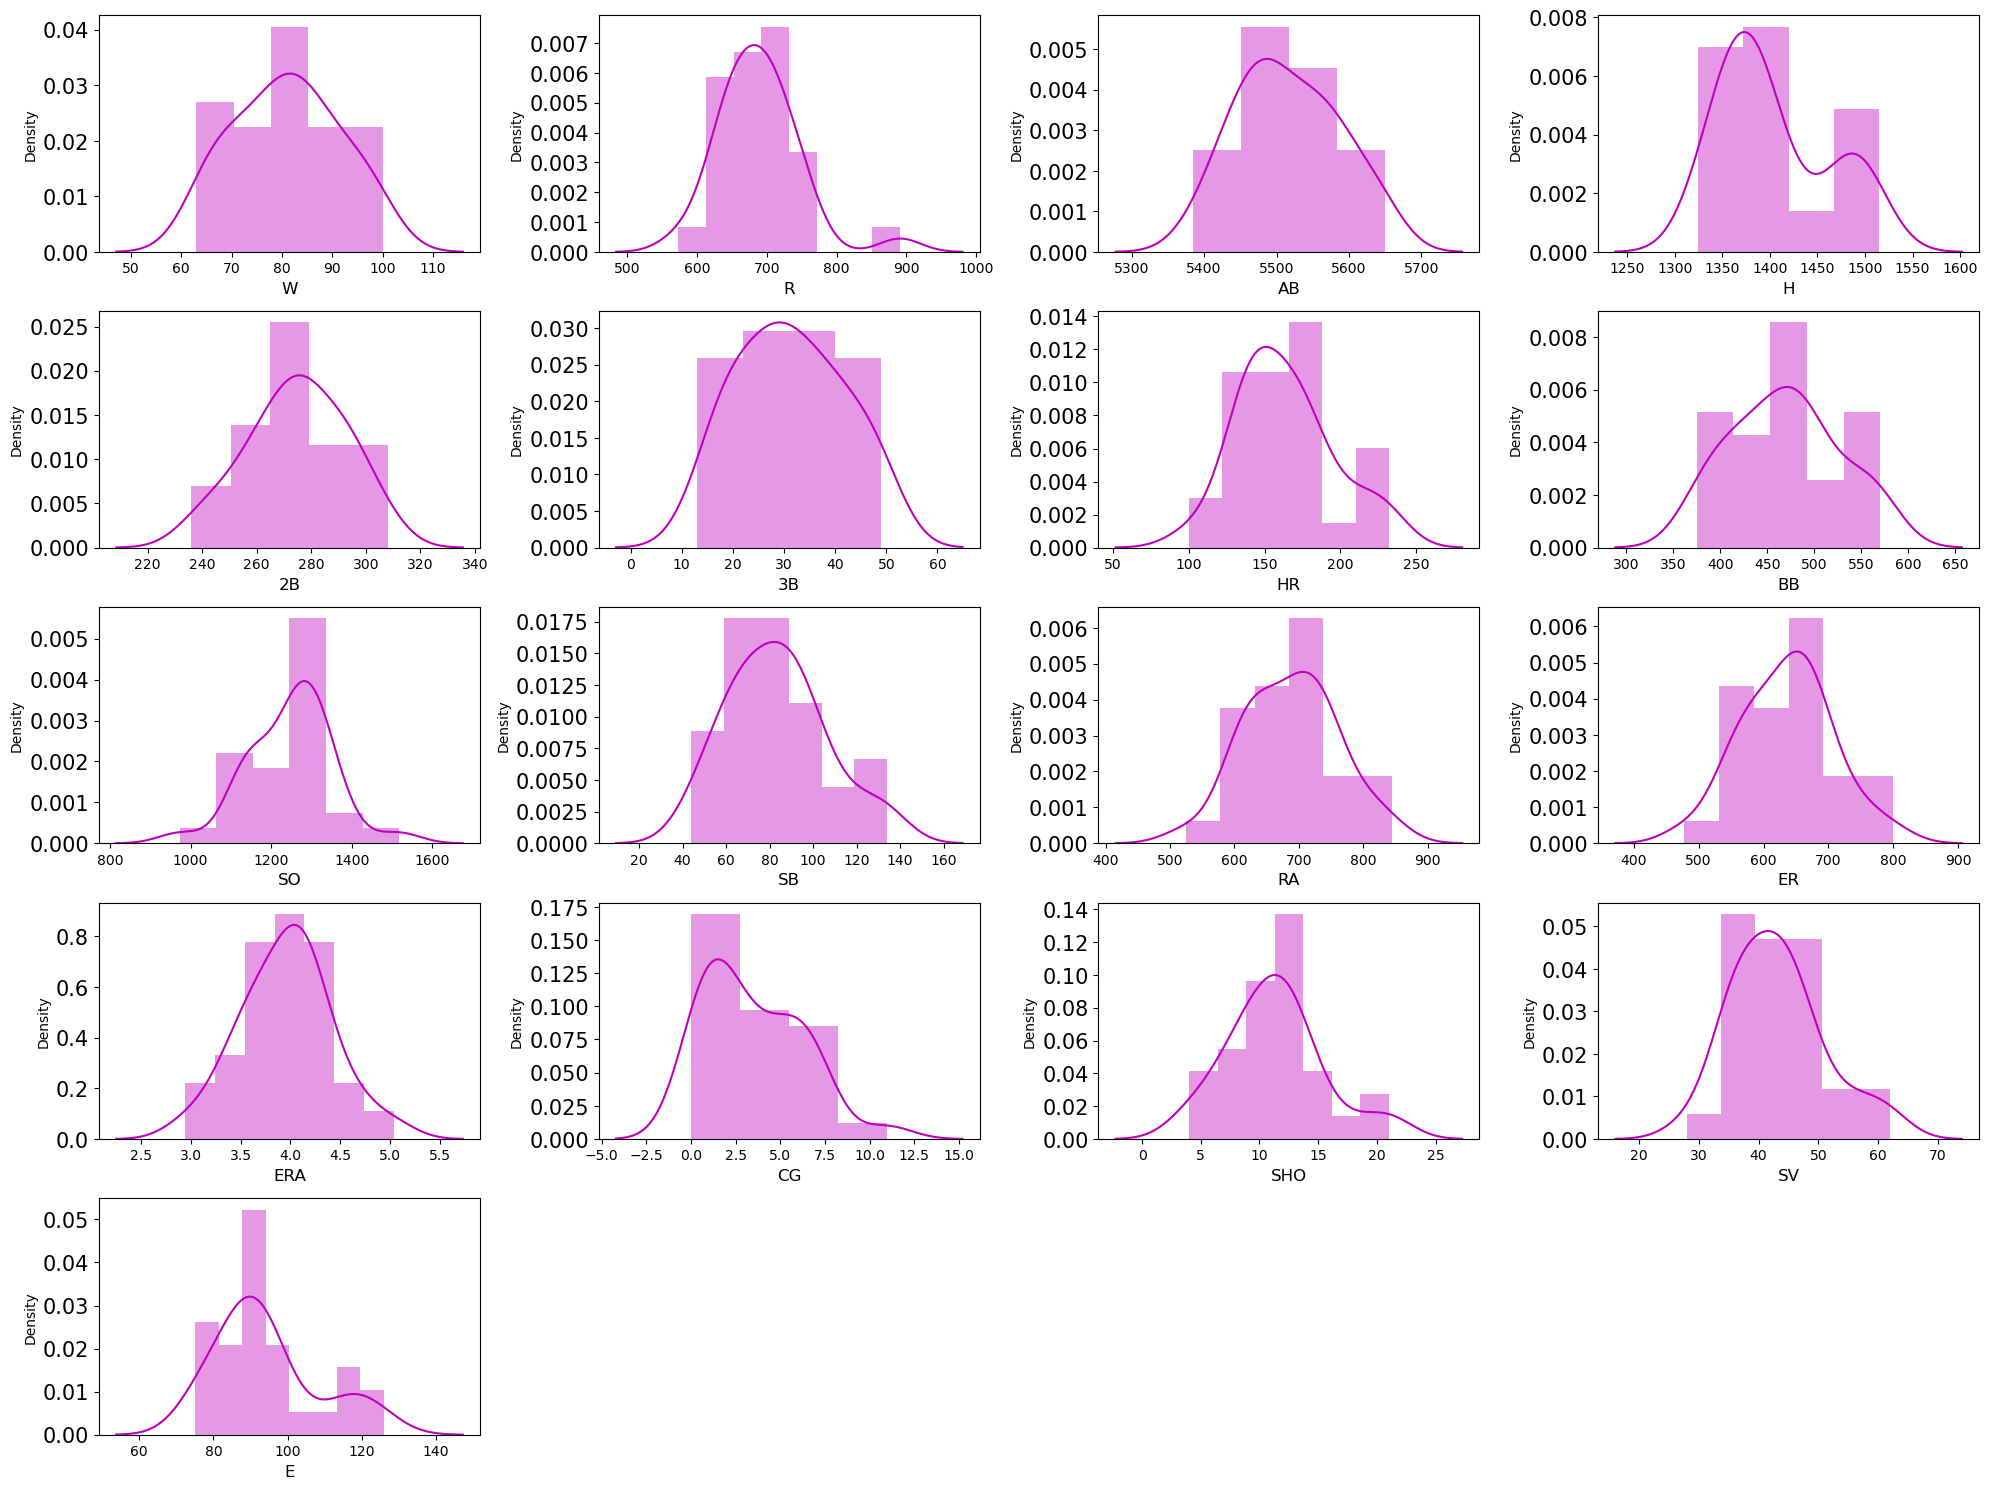

In [308]:
#CHECKING THE DISTRIBUTION
plt.figure(figsize=(20,15), facecolor= "white")
plotnumber = 1
for col in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4, plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation= 0, fontsize=15)
    plotnumber+=1
plt.tight_layout()   

all features are almost normally distributed there is no more skewness we can check it

Detecting outliers

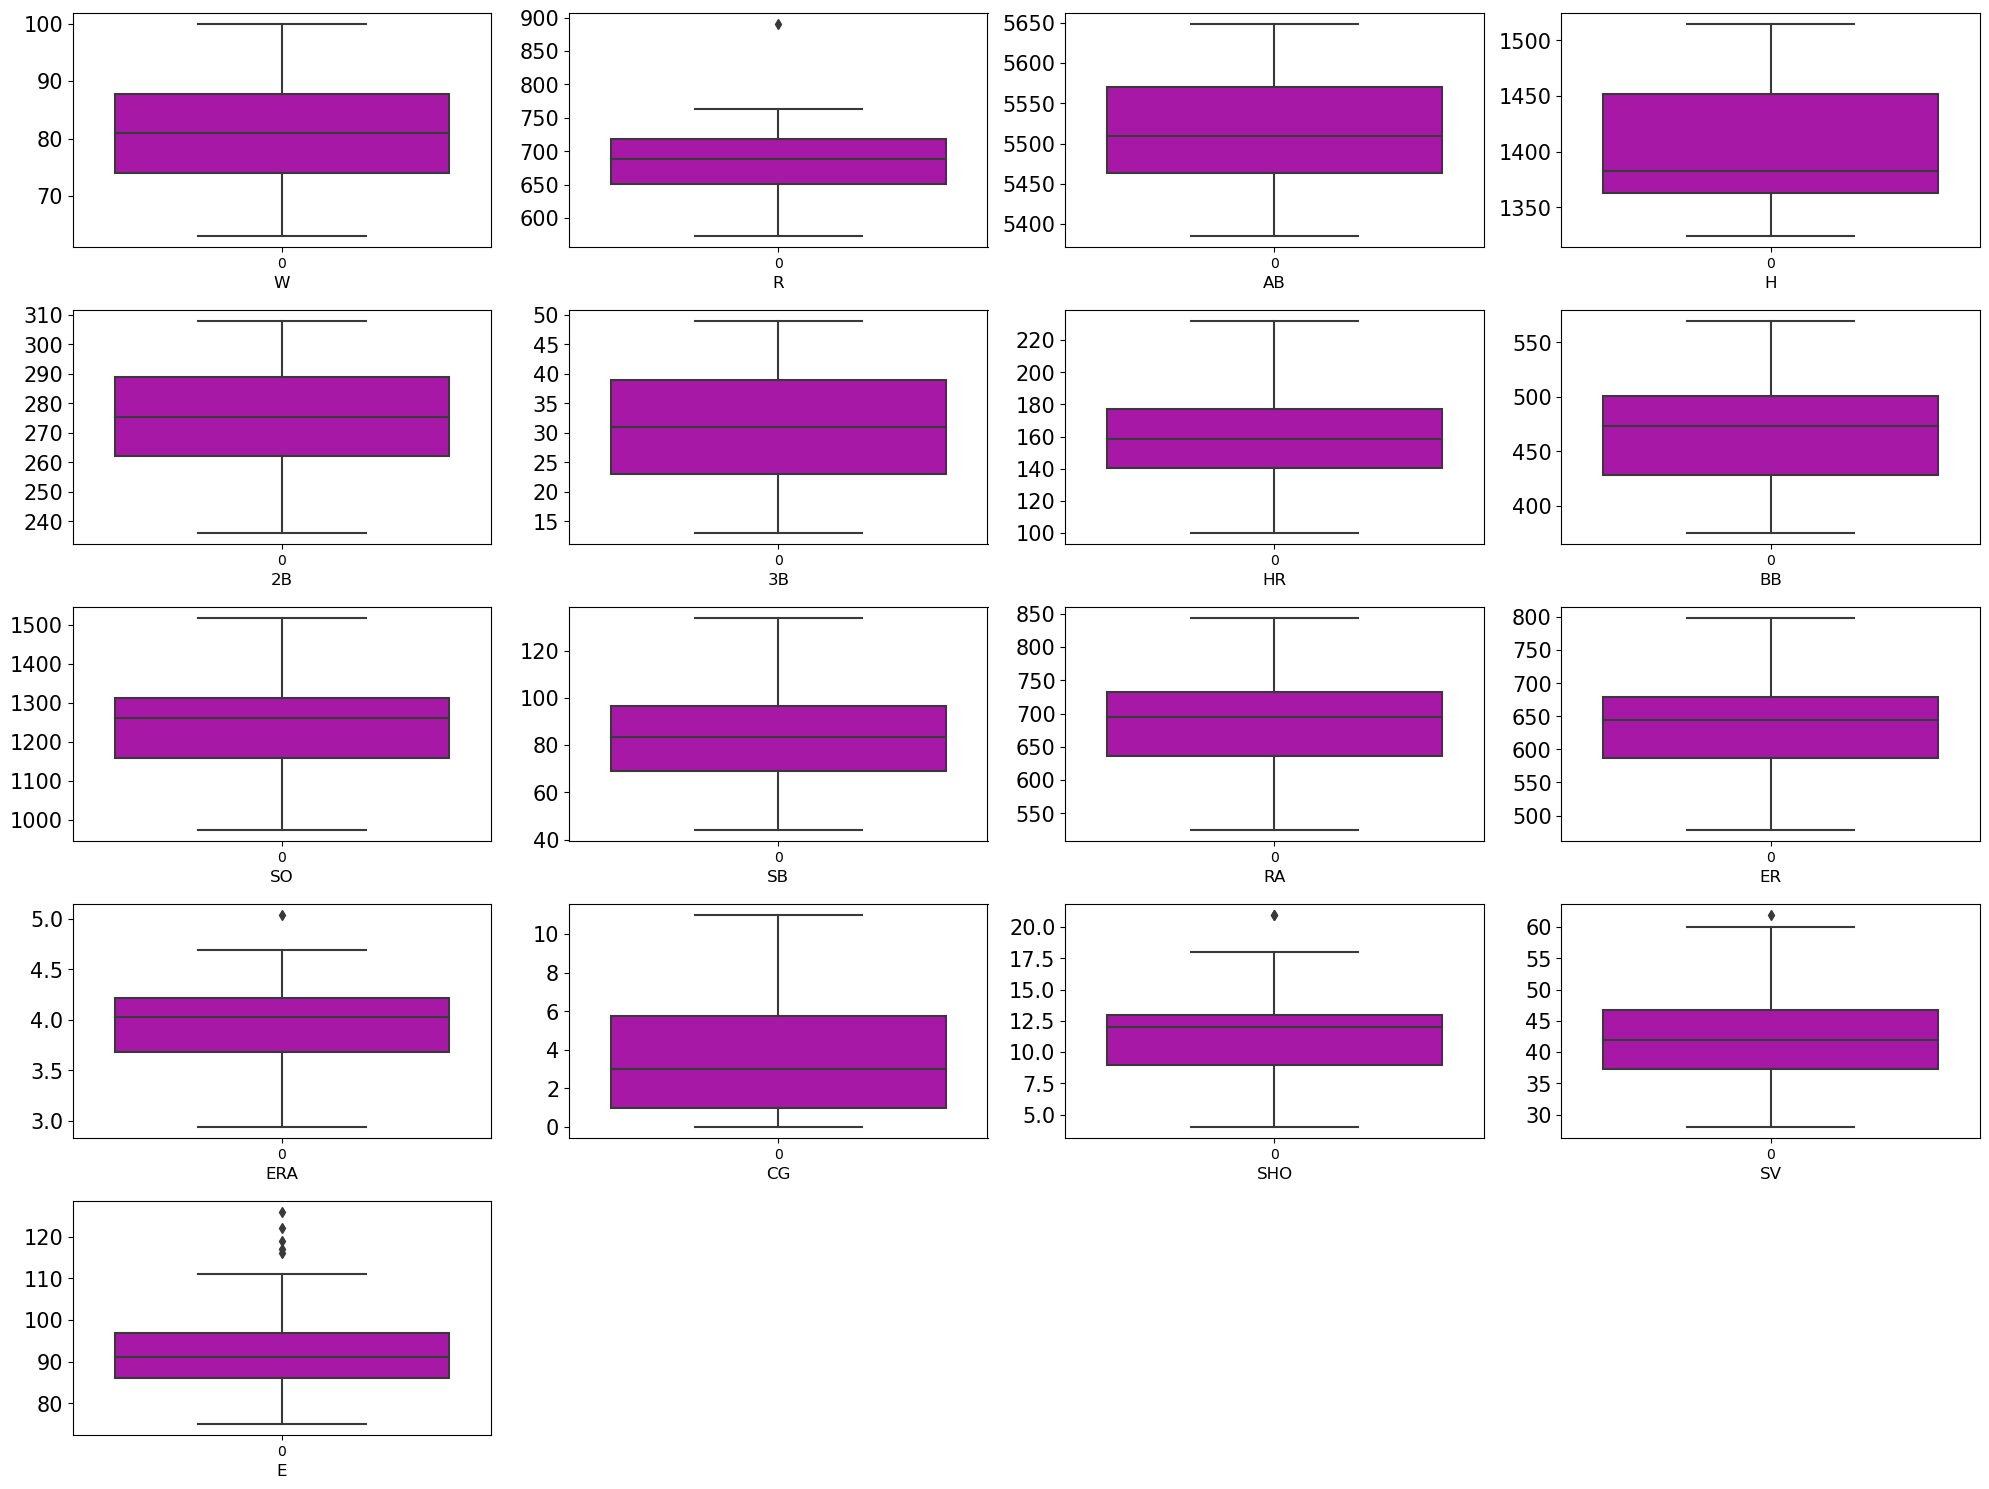

In [309]:
# visulizing the outliers by boxplot
plt.figure(figsize=(20,15), facecolor= "white")
plotnumber = 1
for col in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4, plotnumber)
        sns.boxplot(df[col], color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation= 0, fontsize=15)
    plotnumber+=1
plt.tight_layout()   

there are few outliers in ERA and R column

In [310]:
from scipy.stats import zscore
out_col=df[['R','ERA','E','SHO','SV',]]
z=np.abs(zscore(out_col))
z 

,R,ERA,E,SHO,SV
0,0.619078,0.506955,0.461470,0.814629,1.671607
1,0.134432,0.254598,0.607197,0.172800,0.249879
2,0.332906,0.641347,1.117242,0.320914,0.654856
3,1.146419,0.053010,0.485758,0.567771,0.784104
4,0.013270,1.531318,0.607197,0.172800,1.042600
5,3.509647,0.350165,0.461470,0.320914,1.171848
6,1.311430,0.165003,0.097152,1.802057,0.637623
7,0.428681,0.209800,1.262970,0.320914,0.008617
8,0.765626,0.484557,0.048576,0.172800,2.188598
9,1.034489,0.792164,0.194303,0.320914,0.396360


In [311]:
#threesold=3
np.where(z>3)

(array([5], dtype=int64), array([0], dtype=int64))

In [312]:
z.iloc[5,0]

3.5096470447193067

In [313]:
#removoing the dataabove zscore and creating new df
df1=df[(z<3).all(axis=1)]
df1.shape

(29, 17)

In [314]:
#removoing the dataabove zscore and creating new df
df1=df[(z<3).all(axis=1)]
df1.shape

(29, 17)

In [315]:
#shape of old and new data
print("old data frame.--",df.shape[0])
print("new data frame.--",df1.shape[0])

old data frame.-- 30
new data frame.-- 29


In [316]:
print("data loss percentage--", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage-- 3.3333333333333335


DATA loss is not more than 10%

In [317]:
df1

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [318]:
df=df1

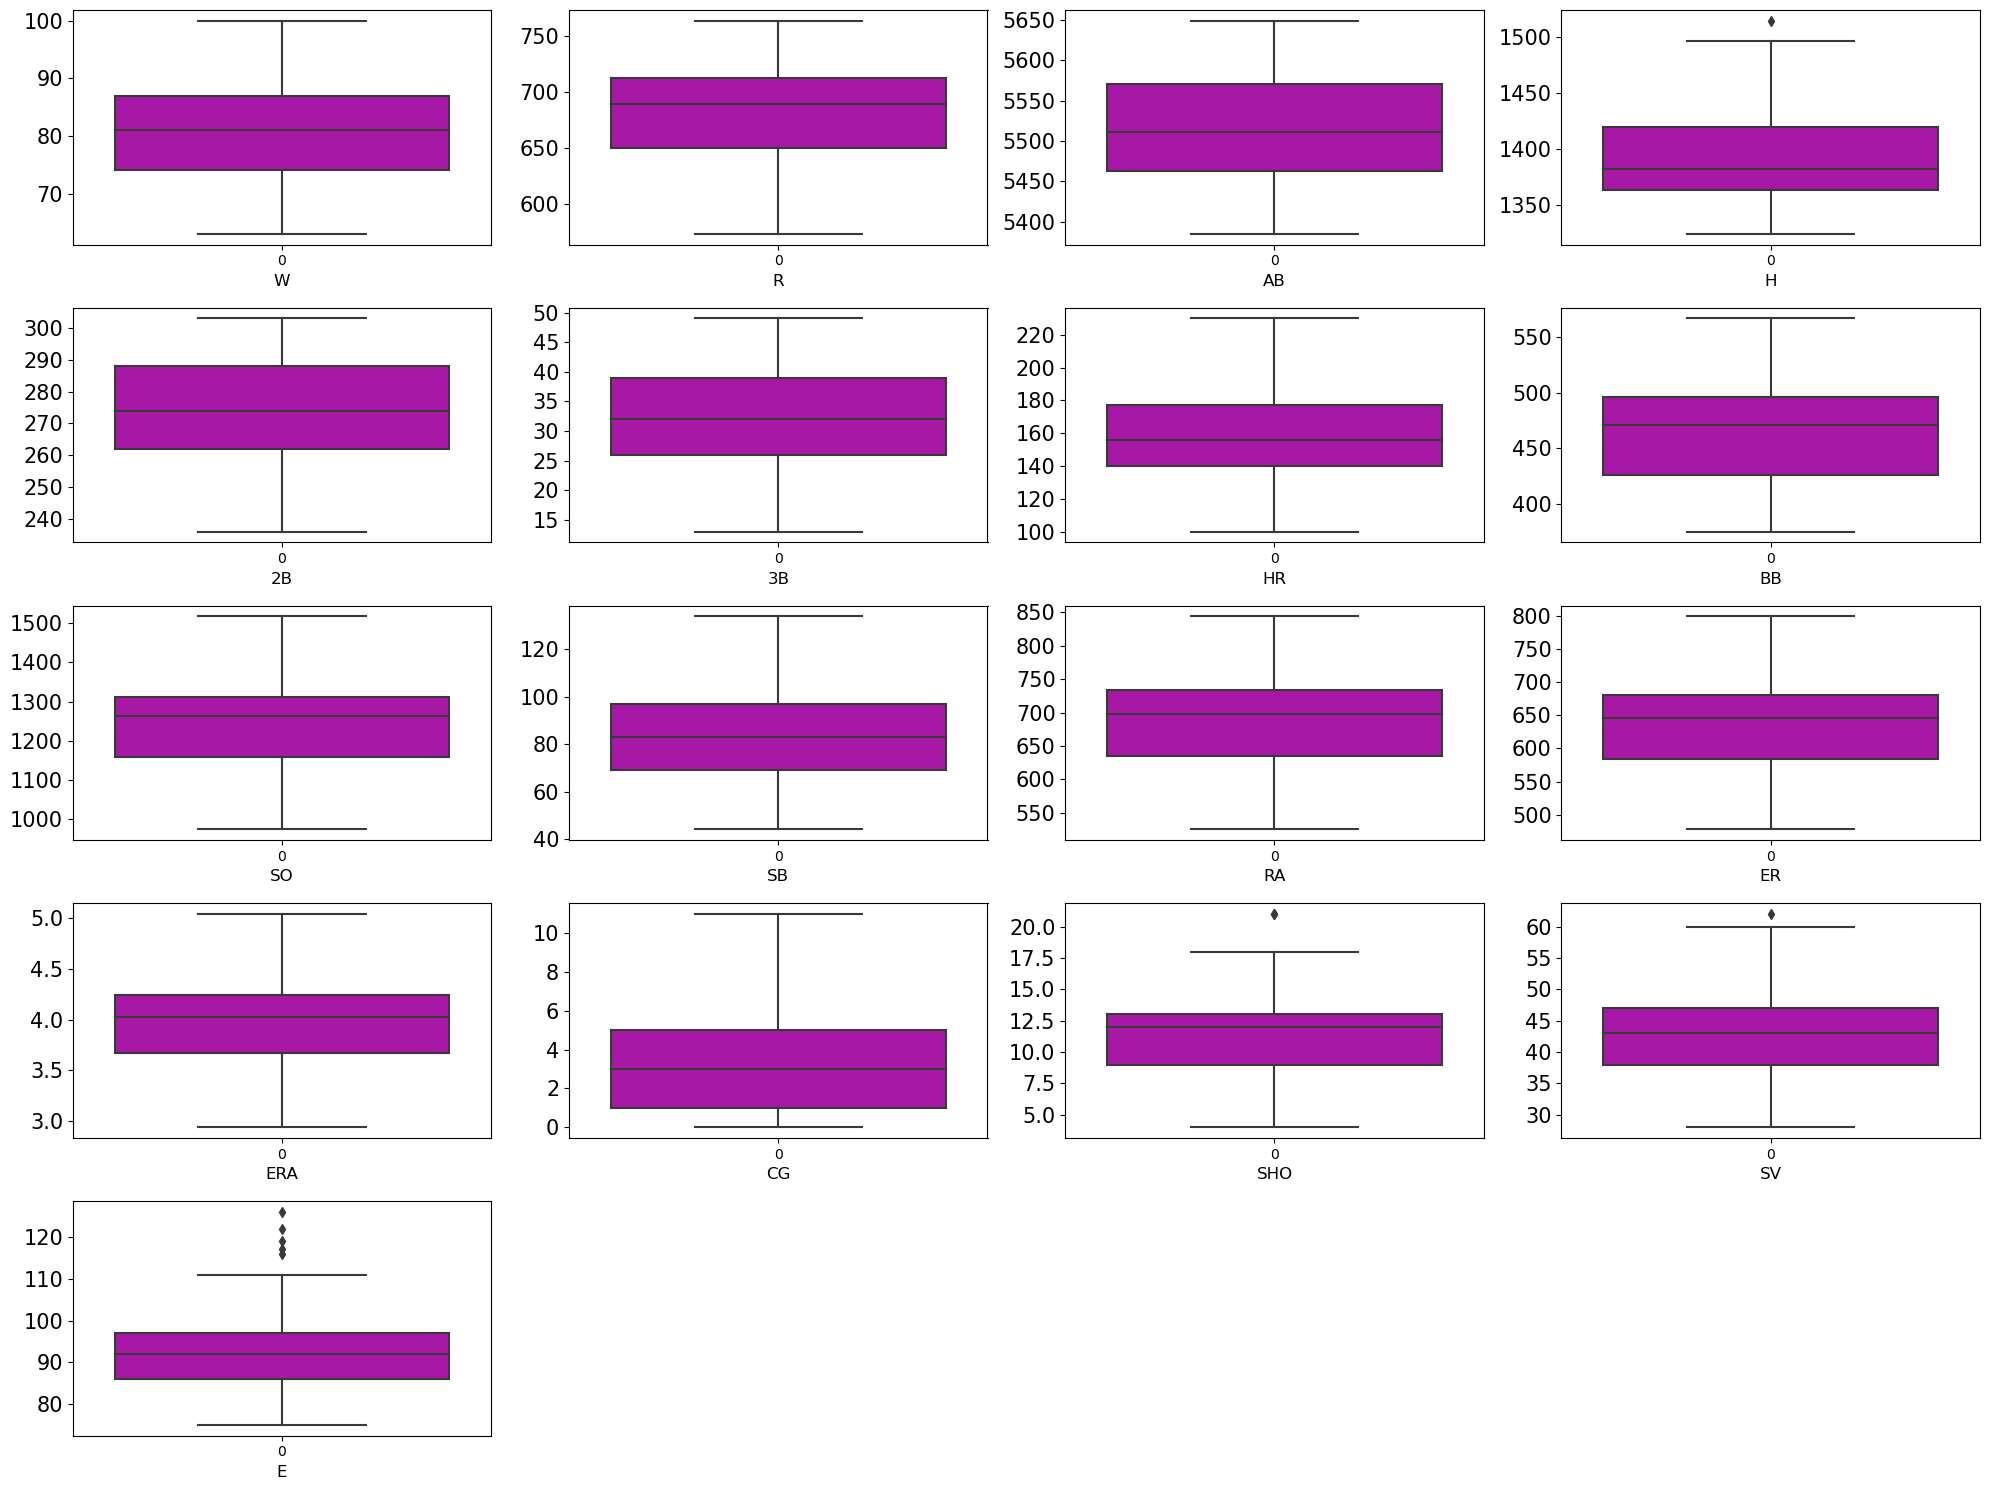

In [319]:
# visulizing the outliers by boxplot
plt.figure(figsize=(20,15), facecolor= "white")
plotnumber = 1
for col in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4, plotnumber)
        sns.boxplot(df[col], color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation= 0, fontsize=15)
    plotnumber+=1
plt.tight_layout()   

very few less outliers in H feature

In [320]:
#check the correlation between features vs features and target vs features
cor = df.corr()
cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
R,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
AB,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
H,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
2B,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
3B,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
HR,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
BB,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
SO,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
SB,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


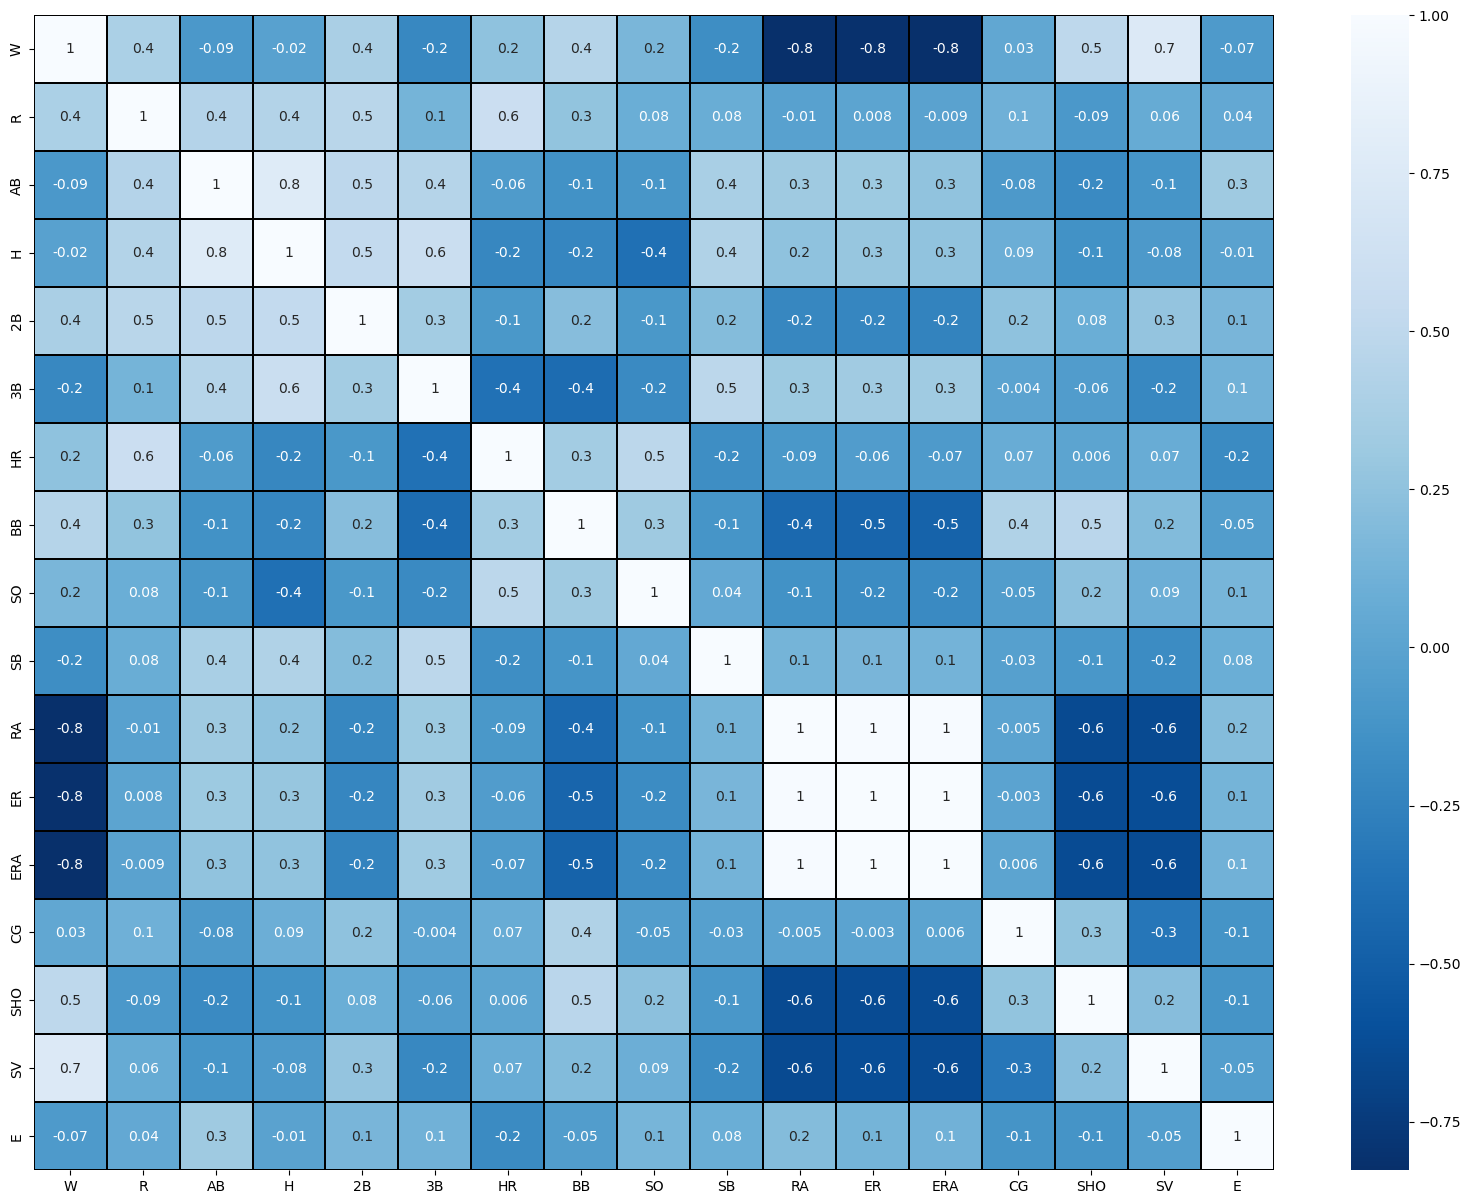

In [253]:
#by using heatmap checking the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1,fmt='.1g', linecolor="black", annot=True, cmap="Blues_r")
plt.show()

from the above many features are correlated with each other and also with target
1)W is highly negative correlated with ERA,ER,RA and R.
2)SHO are negatively correlated with RA,ER,ERA.
3)ERA,ER,RA are highly positive correlated with each other.
4)we can drop any one features after checking the vif values.

In [321]:
#checking skewness
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

There is no high skewness in any feature.... but in features like E,SHO,CG and H have low skewness.

In [322]:
#removing skewness using cuberoot method the acceptable range is -0.5 to +0.5
df["E"]=np.cbrt(df["E"])
df["SHO"]=np.cbrt(df["SHO"])
df["CG"]=np.cbrt(df["CG"])
df["H"]=np.cbrt(df["H"])

In [323]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.753696
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -1.013981
SHO   -0.298136
SV     0.627480
E      0.671748
dtype: float64

Now the skewness are in range.

In [341]:
#Seperating the label and features¶
x=df.drop('W', axis=1)
y=df["W"]

In [342]:
print(x.shape)
print(y.shape)

(29, 16)
(29,)


In [343]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.728647,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.094672,-0.756001,1.643157,-0.448230
1,0.331147,-0.702831,-0.946162,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.094672,0.274630,0.211006,-0.604643
2,-0.274666,-1.100253,-0.094708,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,1.615608,-0.206072,-0.700362,-1.171994
3,-1.329231,0.233951,-0.351839,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.063794,-0.470829,-0.830557,0.514746
4,0.174084,1.255894,2.041742,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.063794,0.274630,-1.090948,-0.604643
5,1.856900,0.716535,-0.058116,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.228786,-2.225231,0.601593,-0.067301
6,0.712585,-0.447345,-0.555092,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-2.329822,-0.206072,-0.049384,-1.340220
7,-0.835605,-0.447345,-0.315000,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.555782,0.274630,2.163939,0.081247
8,1.497899,1.752672,1.693704,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.228786,-0.206072,-0.439971,0.227724
9,1.565212,-0.078310,0.342114,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.703744,-0.470829,0.211006,1.720140


# PCA

In [344]:
from sklearn.decomposition import PCA

In [345]:
pca=PCA(n_components=9)#REDUCING THE DIMENSIONS OF FEATURES 16 TO 9

In [346]:
pca.fit(x)

PCA(n_components=9)

In [347]:
x_pca=pca.transform(x)

In [348]:
x.shape

(29, 16)

In [349]:
x_pca.shape

(29, 9)

there is a reduction in dimensionality and changes in dimensions

#checking the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

the vif is very high in ER,ERA,RA and AB we are going to drop one column

x=df.drop(columns=['ER','W'], axis=1)

#checking the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

x=df.drop(columns=['W','ER','ERA','AB'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

AFTER DROPPING SOME COLUMNS THERE IS A HUGE INCREASE IN VIF

# MODELLING

In [350]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [351]:
x_train, x_test, y_train, y_test = train_test_split(x_pca,y, test_size=0.30, random_state=90)

In [352]:
models=[LinearRegression(),DecisionTreeRegressor(),KNN(),RandomForestRegressor(),
        GradientBoostingRegressor(),SVR()]

In [353]:
def r2score_train_test():
    
    for model in models:
        model.fit(x_train,y_train)
        y_train_pred = model.predict(x_train)
        y_test_pred =model.predict(x_test)
        
        
    
        print(model)
        print('r2 Score for the training',  '=', r2_score(y_train,y_train_pred)*100)
        print('r2 Score for the testing', '=',  r2_score(y_test,y_test_pred)*100)
        print('Mean Absolute Error:',  '=',  mean_absolute_error(y_test,y_test_pred))
        print('Mean squared Error:', '=',  mean_squared_error(y_test,y_test_pred))
        print('Root Mean square Error:', '=',   np.sqrt(mean_squared_error(y_test,y_test_pred))) 
        print('-'*30)  
        print("\n")
              

In [354]:
r2score_train_test()

LinearRegression()
r2 Score for the training = 87.21299997037669
r2 Score for the testing = 81.30151286486397
Mean Absolute Error: = 2.655347917177421
Mean squared Error: = 11.468405442883435
Root Mean square Error: = 3.3865034243129646
------------------------------


DecisionTreeRegressor()
r2 Score for the training = 100.0
r2 Score for the testing = -23.550724637681153
Mean Absolute Error: = 6.888888888888889
Mean squared Error: = 75.77777777777777
Root Mean square Error: = 8.70504323813373
------------------------------


KNeighborsRegressor()
r2 Score for the training = 71.24201502320065
r2 Score for the testing = 50.88405797101447
Mean Absolute Error: = 4.355555555555556
Mean squared Error: = 30.124444444444457
Root Mean square Error: = 5.488573990067407
------------------------------


RandomForestRegressor()
r2 Score for the training = 91.52547077550511
r2 Score for the testing = 66.8984420289855
Mean Absolute Error: = 3.4577777777777783
Mean squared Error: = 20.3022888888889
R

In [362]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_pca,y, test_size=0.30, random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc= r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS= i
print("Best r2_score is", maxAccu, "at random_state", maxRS)

Best r2_score is 0.8927271813343054 at random_state 75


In [363]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_pca,y, test_size=0.30, random_state=i)
    RFR=RandomForestRegressor()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc= r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS= i
print("Best r2_score is", maxAccu, "at random_state", maxRS)

Best r2_score is 0.7385204484783768 at random_state 71


In [364]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_pca,y, test_size=0.30, random_state=i)
    GFR=GradientBoostingRegressor()
    GFR.fit(x_train,y_train)
    pred=GFR.predict(x_test)
    acc= r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS= i
print("Best r2_score is", maxAccu, "at random_state", maxRS)

Best r2_score is 0.7813171180358347 at random_state 23


LINEAR REGRESSION IS THE BEST MODEL

In [369]:
x_train, x_test, y_train, y_test = train_test_split(x_pca,y, test_size=0.30, random_state=75)
best_model=LinearRegression()
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
print('r2 Score for the testing', '=',  r2_score(y_test,pred)*100)
print('Mean Absolute Error:',  '=',  mean_absolute_error(y_test,pred))
print('Mean squared Error:', '=',  mean_squared_error(y_test,pred))
print('Root Mean square Error:', '=',   np.sqrt(mean_squared_error(y_test,pred))) 

r2 Score for the testing = 89.27271813343054
Mean Absolute Error: = 3.094041191784533
Mean squared Error: = 15.423447483712083
Root Mean square Error: = 3.9272697238300407


In [370]:
#saving model using .pkl
import joblib
joblib.dump(best_model ,"wins_prediction.pkl")

['wins_prediction.pkl']